# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 12.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
173437,0.0977,0.4468,0.4419,0.0684,0.0049,0.0049,0.2002,0.8423,0.0952,0.2930,7,7,9,9
226947,0.0732,0.0122,0.0928,0.0024,0.0024,0.0024,0.1245,0.3540,0.0024,0.1782,1,1,16,16
135,0.0366,0.0024,0.0049,0.0024,0.0024,0.0024,0.0244,0.0830,0.0024,0.2222,0,0,0,0
26958,0.0488,0.0024,0.0366,0.0854,0.0024,0.0024,0.0244,0.3394,0.1245,0.3320,0,0,0,0
116407,0.1074,0.3931,0.7642,0.0098,0.0024,0.0024,0.0781,0.4077,0.0024,0.1538,9,0,2,0


In [3]:
raw_data.shape

(460382, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460382 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          460382 non-null  float64
 1   Emg2          460382 non-null  float64
 2   Emg3          460382 non-null  float64
 3   Emg4          460382 non-null  float64
 4   Emg5          460382 non-null  float64
 5   Emg6          460382 non-null  float64
 6   Emg7          460382 non-null  float64
 7   Emg8          460382 non-null  float64
 8   Emg9          460382 non-null  float64
 9   Emg10         460382 non-null  float64
 10  repetition    460382 non-null  int64  
 11  rerepetition  460382 non-null  int64  
 12  stimulus      460382 non-null  int64  
 13  restimulus    460382 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000
mean,0.228323,0.149005,0.158937,0.051782,0.009471,0.009314,0.118619,0.383167,0.090241,0.158943,3.201413,2.333123,5.674920,4.168397
std,0.386383,0.289871,0.354328,0.167727,0.031863,0.031848,0.278554,0.484126,0.287058,0.150671,3.487234,3.297521,6.590112,6.223571
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041500,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.102500,0.002400,0.031700,0.000000,0.000000,0.000000,0.000000
50%,0.087900,0.034200,0.002400,0.002400,0.002400,0.002400,0.048800,0.214800,0.002400,0.141600,2.000000,0.000000,3.000000,0.000000
75%,0.214800,0.161100,0.153800,0.007300,0.002400,0.002400,0.127000,0.505400,0.034200,0.239300,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.668000,4.663100,4.665500,1.171900,0.778800,4.665500,4.668000,4.663100,2.878400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     192400
4      15502
7      15495
12     15491
8      15487
2      15486
11     15469
9      15465
6      15448
5      15447
3      15425
1      15417
10     15406
14     10334
13     10332
17     10332
15     10293
16     10255
19      5172
18      5169
21      5169
23      5133
20      5130
22      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

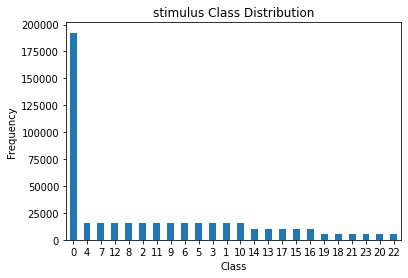

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
194550,0.1855,0.0024,0.0928,0.1953,0.0024,0.0024,0.0806,0.3003,0.3467,0.1929,2,2,12,12
433407,1.4014,0.5273,0.6030,0.3809,0.0586,0.0195,0.1538,0.4883,0.6689,0.2515,6,6,21,21
396152,0.4443,0.1465,0.1172,0.0024,0.0024,0.0024,0.1147,0.2466,0.0049,0.1001,0,0,0,0
429298,2.2412,0.5420,0.8691,0.3906,0.1172,0.1245,1.0889,2.6685,0.7227,0.6006,1,1,21,21
142377,0.0488,0.0024,0.0073,0.0781,0.0024,0.0024,0.0269,0.4126,0.1953,0.1904,10,10,5,5


In [12]:
raw_data.shape

(380069, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380069 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          380069 non-null  float64
 1   Emg2          380069 non-null  float64
 2   Emg3          380069 non-null  float64
 3   Emg4          380069 non-null  float64
 4   Emg5          380069 non-null  float64
 5   Emg6          380069 non-null  float64
 6   Emg7          380069 non-null  float64
 7   Emg8          380069 non-null  float64
 8   Emg9          380069 non-null  float64
 9   Emg10         380069 non-null  float64
 10  repetition    380069 non-null  int64  
 11  rerepetition  380069 non-null  int64  
 12  stimulus      380069 non-null  int64  
 13  restimulus    380069 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.5 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree Classifier

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 80.42860525692636


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     37518
           1       0.77      0.75      0.76      2216
           2       0.69      0.70      0.69      2231
           3       0.73      0.74      0.74      2098
           4       0.70      0.73      0.71      2142
           5       0.69      0.69      0.69      2303
           6       0.75      0.73      0.74      2161
           7       0.68      0.67      0.67      2362
           8       0.73      0.71      0.72      2236
           9       0.70      0.69      0.69      2288
          10       0.70      0.70      0.70      2451
          11       0.69      0.71      0.70      2048
          12       0.60      0.61      0.60      2126
          13       0.66      0.67      0.67      1397
          14       0.60      0.61      0.61      1285
          15       0.61      0.63      0.62      1381
          16       0.70      0.70      0.70      1373
 

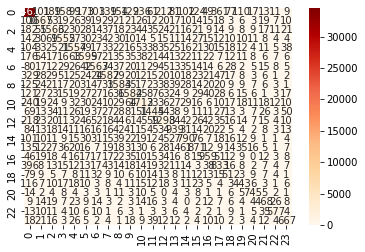

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.5262320098929145
MSE: 17.7319309600863
RMSE: 4.21092994005912


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8045887086081375
Recall Score :  0.8042860525692636
f1_score :  0.8043847498130263


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 90.56884258162971


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     37518
           1       0.92      0.91      0.91      2216
           2       0.88      0.86      0.87      2231
           3       0.88      0.87      0.87      2098
           4       0.89      0.88      0.88      2142
           5       0.87      0.86      0.86      2303
           6       0.93      0.91      0.92      2161
           7       0.79      0.77      0.78      2362
           8       0.90      0.89      0.90      2236
           9       0.91      0.89      0.90      2288
          10       0.89      0.87      0.88      2451
          11       0.92      0.93      0.92      2048
          12       0.85      0.85      0.85      2126
          13       0.86      0.87      0.87      1397
          14       0.80      0.80      0.80      1285
          15       0.76      0.76      0.76      1381
          16       0.91      0.90      0.91      1373
 

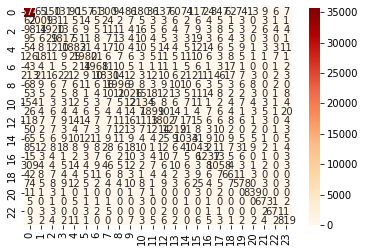

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.8101402373247033
MSE: 9.822901044544427
RMSE: 3.134150769274578


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9053360129450084
Recall Score :  0.905688425816297
f1_score :  0.9054485258890143


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.210829584024


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37518
           1       0.93      0.89      0.91      2216
           2       0.93      0.84      0.88      2231
           3       0.94      0.84      0.89      2098
           4       0.92      0.87      0.89      2142
           5       0.91      0.85      0.88      2303
           6       0.95      0.89      0.92      2161
           7       0.83      0.77      0.80      2362
           8       0.92      0.89      0.90      2236
           9       0.90      0.86      0.88      2288
          10       0.92      0.83      0.87      2451
          11       0.93      0.91      0.92      2048
          12       0.89      0.82      0.85      2126
          13       0.91      0.85      0.88      1397
          14       0.87      0.76      0.82      1285
          15       0.76      0.81      0.79      1381
          16       0.94      0.87      0.91      1373
 

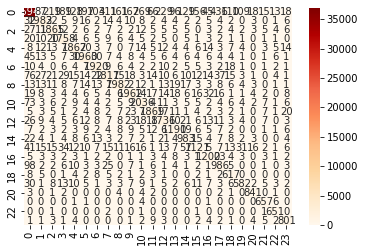

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.7480990343884021
MSE: 9.036651143210461
RMSE: 3.0061023174886214


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9118958966217489
Recall Score :  0.91210829584024
f1_score :  0.9103600524123018


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 90.46491435788144


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37518
           1       0.91      0.89      0.90      2216
           2       0.91      0.82      0.86      2231
           3       0.93      0.82      0.87      2098
           4       0.89      0.85      0.87      2142
           5       0.89      0.83      0.86      2303
           6       0.93      0.88      0.90      2161
           7       0.83      0.76      0.79      2362
           8       0.90      0.87      0.89      2236
           9       0.89      0.85      0.87      2288
          10       0.90      0.82      0.86      2451
          11       0.91      0.90      0.90      2048
          12       0.86      0.80      0.83      2126
          13       0.90      0.84      0.87      1397
          14       0.85      0.75      0.80      1285
          15       0.74      0.80      0.77      1381
          16       0.92      0.86      0.89      1373
 

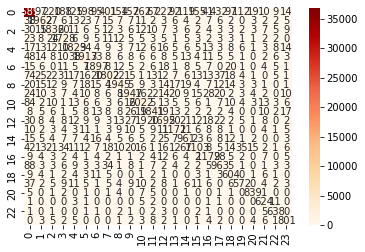

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7840003157313127
MSE: 9.316086510379668
RMSE: 3.0522264841226425


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9037780301141464
Recall Score :  0.9046491435788144
f1_score :  0.9026756957910106


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 89.40853000763018


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     37518
           1       0.88      0.87      0.88      2216
           2       0.87      0.82      0.84      2231
           3       0.90      0.83      0.86      2098
           4       0.87      0.83      0.85      2142
           5       0.86      0.82      0.84      2303
           6       0.92      0.87      0.89      2161
           7       0.82      0.77      0.79      2362
           8       0.89      0.86      0.87      2236
           9       0.86      0.83      0.85      2288
          10       0.86      0.82      0.84      2451
          11       0.88      0.88      0.88      2048
          12       0.80      0.76      0.78      2126
          13       0.85      0.81      0.83      1397
          14       0.79      0.74      0.76      1285
          15       0.73      0.77      0.75      1381
          16       0.87      0.83      0.85      1373
 

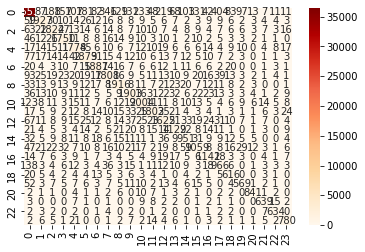

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.8506722445865236
MSE: 10.003591443681428
RMSE: 3.1628454662979393


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8922259412579882
Recall Score :  0.8940853000763017
f1_score :  0.8924126583236768
